### Project : Fraud Detection in Treasury Management System

#### import required libraries    

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#load and read data
df=pd.read_csv("txn_filtered.csv")

In [3]:
# Set display options
pd.set_option('display.float_format', '{:.10g}'.format)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,number,instrument_id,currency_id,currency_2_id,sign_id,date,deal_rate,deal_price,amount,book_value,portfolio_id,state_id,cp_client_id,owner_id
0,1,USD D/L,USD,NaN,1,2022-01-03,0,NaN,262000000,262000000,ASIA-CAL-POOL,FINAL,CPTY1,CMPNY-OWNER
1,2,USD D/L,USD,NaN,-1,2022-01-03,0,NaN,-262000000,-262000000,MMPO-USD-CAL,FINAL,CPTY1,CMPNY-OWNER
2,3,USD D/L,USD,NaN,-1,2022-01-03,0.07,NaN,-641164.56,-641164.56,MMFX-CAL,FINAL,CPTY1,CMPNY-OWNER
3,4,HKD D/L,HKD,NaN,1,2022-01-03,0.06,NaN,5000000,5000000,MMFX-CAL,FINAL,CPTY1,CMPNY-OWNER
4,5,USD D/L,USD,NaN,1,2022-01-03,0.07,NaN,641164.56,641164.56,MMPO-USD-CAL,FINAL,CPTY1,CMPNY-OWNER


### Exploratory Data Analysis                                                           

In [4]:
print("Number of Rows and Columns are ",format(df.shape))

Number of Rows and Columns are  (13817, 14)


In [5]:
df.describe()

,number,sign_id,deal_rate,deal_price,amount,book_value
count,13817,13817,11710,4,13817,13811
mean,6909,0.3140334371,60.52396005,100,9142854.21,9146826.198
std,3988.76867,0.9492175532,261.3834932,0,534783190.3,534899316.7
min,1,-1,0,100,-6523413000,-6523413000
25%,3455,-1,0.011643297,100,-198591.83,-198980.81
50%,6909,1,0.0132893835,100,102780.99,102888.94
75%,10363,1,3.58,100,949474.23,950000
max,13817,1,1418.3,100,5.2035254e+10,5.2035254e+10


In [6]:
df['date'].value_counts()

date
2022-01-26    4990
2022-01-28     997
2022-02-23     531
2022-04-22     479
2022-03-28     437
2022-04-21     337
2022-01-14     336
2022-02-16     335
2022-03-18     322
2022-03-22     224
2022-04-25     207
2022-01-18     204
2022-02-18     198
2022-03-17     182
2022-02-15     158
2022-04-20     144
2022-01-13     143
2022-04-27     128
2022-03-23     116
2022-03-21     112
2022-04-26     102
2022-02-28      97
2022-04-07      78
2022-03-07      78
2022-02-21      78
2022-01-24      77
2022-02-03      75
2022-01-19      70
2022-02-07      70
2022-04-08      68
2022-01-17      67
2022-02-25      67
2022-02-17      65
2022-03-16      65
2022-01-10      65
2022-02-22      64
2022-04-04      63
2022-01-05      61
2022-03-09      58
2022-01-25      56
2022-01-27      56
2022-01-11      56
2022-03-30      55
2022-03-29      55
2022-04-01      54
2022-01-20      54
2022-02-24      54
2022-03-11      53
2022-03-03      52
2022-02-04      52
2022-02-08      51
2022-01-31      50
2022-04

In [7]:
#Check for NULL Count
print("\n========================================")
print("Columns                       NullCount")
print("=========================================")
print(df.isnull().sum())

#Check for NULL records
print("Columns                       IsNull")
print("=========================================")
print(df.isnull().any())


Columns                       NullCount
number               0
instrument_id        0
currency_id          0
currency_2_id     5981
sign_id              0
date                 0
deal_rate         2107
deal_price       13813
amount               0
book_value           6
portfolio_id         0
state_id             0
cp_client_id         0
owner_id             0
dtype: int64
Columns                       IsNull
number           False
instrument_id    False
currency_id      False
currency_2_id     True
sign_id          False
date             False
deal_rate         True
deal_price        True
amount           False
book_value        True
portfolio_id     False
state_id         False
cp_client_id     False
owner_id         False
dtype: bool


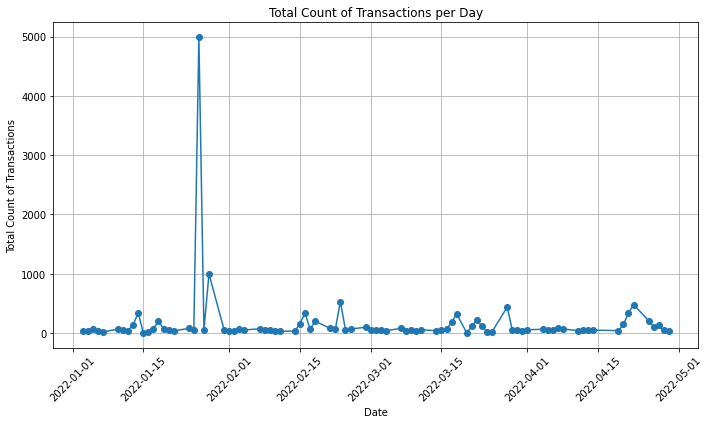

In [8]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Aggregate data by date
transaction_counts = df.groupby('date').size().reset_index(name='transaction_count')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(transaction_counts['date'], transaction_counts['transaction_count'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Count of Transactions')
plt.title('Total Count of Transactions per Day')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# # Scatter Plot integer and Float columns
# cols = df.select_dtypes(include=['int', 'float'])

# # Create a pairplot for integer columns
# sns.pairplot(cols)
# plt.suptitle('Scatter Plot for Integer Columns', y=1.02)
# plt.show()

In [10]:

# # Check for duplicate rows
# num_duplicates = df.duplicated().sum()
# total_rows = len(df)
# num_non_duplicates = total_rows - num_duplicates

# # Data for pie chart
# labels = ['Duplicates', 'Non-Duplicates']
# sizes = [num_duplicates, num_non_duplicates]
# colors = ['#ff4d4d','#66b3ff']
# explode = (0.2, 0)  # explode the 1st slice

# # Plotting the pie chart
# plt.figure(figsize=(6, 4))
# patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
#         shadow=True, startangle=140)

# # Make the labels and percentages more visible
# for text in texts:
#     text.set_fontsize(10)
#     text.set_color('brown')
#     text.set_weight('bold')
# for autotext in autotexts:
#     autotext.set_fontsize(10)
#     autotext.set_color('darkblue')


# plt.title('Percentage of Duplicate Records')
# plt.show()


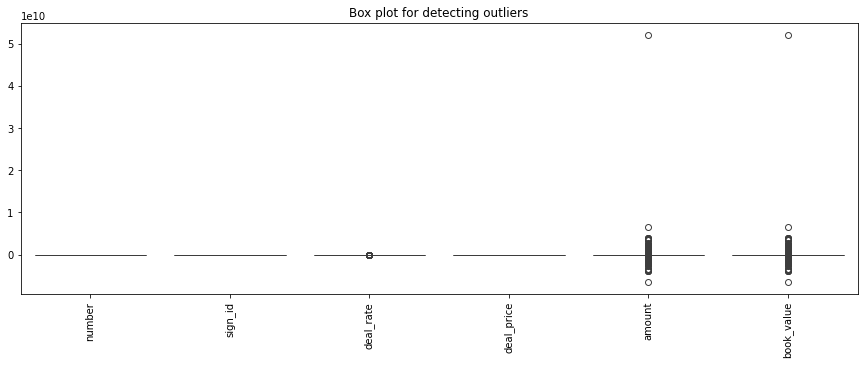

In [11]:
# Plot box plot for each feature to visually identify outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.title("Box plot for detecting outliers")
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.show()


In [12]:
#Outliers check
#Function to detect outliers using IQR(Inter Quartile Range) method
def outliers_detection(df):
    outliers = pd.DataFrame(columns=df.columns)
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers = pd.concat([outliers, outliers_col])
    return outliers

# Outliers Detectionin the DataFrame
outliers = outliers_detection(df)

print("Outliers detected:")
outliers.head()

Outliers detected:


,number,instrument_id,currency_id,currency_2_id,sign_id,date,deal_rate,deal_price,amount,book_value,portfolio_id,state_id,cp_client_id,owner_id
16,17,FX SPOT/FORWARD,EUR,SEK,1,2022-01-03,10.3156622,NaN,1370000,1370000,FX-RITA-CAL,FINAL,CPTY2,CMPNY-OWNER
28,29,FX SPOT/FORWARD,USD,SEK,-1,2022-01-03,9.094682,NaN,-15148,-15148,FX-RITA-CAL,FINAL,CPTY2,CMPNY-OWNER
49,50,FX SPOT/FORWARD,EUR,SEK,-1,2022-01-04,10.3696629,NaN,-279462,-279462,FX-RITA-CAL,FINAL,CPTY2,CMPNY-OWNER
50,51,FX SPOT/FORWARD,EUR,SEK,-1,2022-01-04,10.3580073,NaN,-338100,-338100,FX-RITA-CAL,FINAL,CPTY2,CMPNY-OWNER
93,94,FX SPOT/FORWARD,EUR,SEK,1,2022-01-05,10.2873223,NaN,107626.3,107626.3,FX-RITA-CAL,FINAL,CPTY2,CMPNY-OWNER


In [13]:
outliers.shape

(12033, 14)

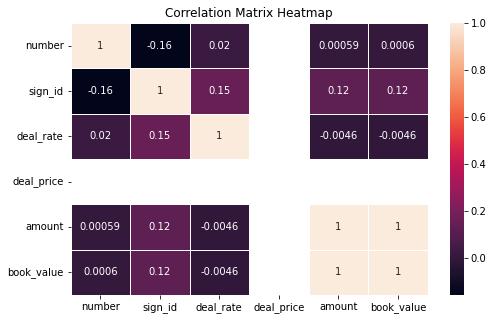

In [14]:
# Correclation Heatmap : Selecting only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, linewidths=0.7)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Feature Engineering                                                            

In [15]:
# Feature Engineering involve handling the features for correction/cleaning/adding/removing/scaling features
# Null Value handling

#Drop column with 100% Null values
df=df.drop(["deal_price","date"],axis=1)
df.head()


,number,instrument_id,currency_id,currency_2_id,sign_id,deal_rate,amount,book_value,portfolio_id,state_id,cp_client_id,owner_id
0,1,USD D/L,USD,NaN,1,0,262000000,262000000,ASIA-CAL-POOL,FINAL,CPTY1,CMPNY-OWNER
1,2,USD D/L,USD,NaN,-1,0,-262000000,-262000000,MMPO-USD-CAL,FINAL,CPTY1,CMPNY-OWNER
2,3,USD D/L,USD,NaN,-1,0.07,-641164.56,-641164.56,MMFX-CAL,FINAL,CPTY1,CMPNY-OWNER
3,4,HKD D/L,HKD,NaN,1,0.06,5000000,5000000,MMFX-CAL,FINAL,CPTY1,CMPNY-OWNER
4,5,USD D/L,USD,NaN,1,0.07,641164.56,641164.56,MMPO-USD-CAL,FINAL,CPTY1,CMPNY-OWNER


In [16]:
# Handling "currency_2_id" column

# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print("Unique values are :\n",df['currency_2_id'].unique())
print("\nTotal Unique values are :\n",df['currency_2_id'].nunique())


Unique values are :
 [nan 'SEK' 'USD' 'CNY' 'DKK' 'HKD' 'JPY' 'NOK' 'OMR' 'QAR' 'ZAR' 'AED'
 'CAD' 'CHF' 'CZK' 'PLN' 'SAR' 'SGD' 'THB' 'EUR' 'GBP' 'KRW' 'AUD' 'NZD'
 'KWD']

Total Unique values are :
 24


In [17]:
#Values and its count
print(df['currency_2_id'].value_counts(dropna=False))

currency_2_id
NaN    5981
USD    3293
SEK    2116
EUR    1563
KRW     576
CHF      92
CNY      67
JPY      57
NOK       8
OMR       7
NZD       5
PLN       5
SAR       4
GBP       4
THB       4
SGD       4
CAD       4
CZK       4
AED       4
ZAR       4
HKD       4
DKK       4
QAR       3
AUD       2
KWD       2
Name: count, dtype: int64


In [18]:
# Handling "currency_2_id" column
# Calculate the mode of the 'item' column
mode_item = df['currency_2_id'].mode()[0]

# Calculate the count of the mode
mode_item_count = df['currency_2_id'].value_counts()[mode_item]

# Display the mode and its count
print(f"The mode of the 'currency_2_id' column is: {mode_item} with a count of: {mode_item_count}")

df["currency_2_id"].fillna("USD", inplace=True)
print(f"Filled the NaN values in 'currency_2_id' column with : {mode_item} value")
df.head()


The mode of the 'currency_2_id' column is: USD with a count of: 3293
Filled the NaN values in 'currency_2_id' column with : USD value


,number,instrument_id,currency_id,currency_2_id,sign_id,deal_rate,amount,book_value,portfolio_id,state_id,cp_client_id,owner_id
0,1,USD D/L,USD,USD,1,0,262000000,262000000,ASIA-CAL-POOL,FINAL,CPTY1,CMPNY-OWNER
1,2,USD D/L,USD,USD,-1,0,-262000000,-262000000,MMPO-USD-CAL,FINAL,CPTY1,CMPNY-OWNER
2,3,USD D/L,USD,USD,-1,0.07,-641164.56,-641164.56,MMFX-CAL,FINAL,CPTY1,CMPNY-OWNER
3,4,HKD D/L,HKD,USD,1,0.06,5000000,5000000,MMFX-CAL,FINAL,CPTY1,CMPNY-OWNER
4,5,USD D/L,USD,USD,1,0.07,641164.56,641164.56,MMPO-USD-CAL,FINAL,CPTY1,CMPNY-OWNER


In [19]:
#Handling deal_rate
#Values and its count
print(df['deal_rate'].value_counts(dropna=False))

deal_rate
NaN            2107
0              1549
10.5660727      205
10.4557644      198
10.3851995      197
10.2708481      190
0.08            190
0.2             142
0.013278818      93
0.18             86
0.33             82
0.3              66
0.013148673      61
9.4746274        60
9.4687047        59
10.4534519       59
10.3822339       59
10.2683605       59
0.011908817      58
10.5638034       58
9.3087443        54
9.2562046        52
0.1              46
0.011211139      42
0.011503889      40
0.011717896      39
0.013262881      37
0.013147298      37
0.19             36
0.012972713      35
0.012996545      34
0.013313311      34
0.013285236      34
0.013105746      32
0.011086404      32
0.16             32
0.013315857      30
0.15             30
0.011231259      29
0.01167033       29
0.013117735      28
0.013138271      28
0.015238567      28
0.000842         28
0.09             28
0.013095688      27
0.012804594      27
0.07             26
0.013087311      26
0.01333193

In [20]:
# Calculate the mean of the 'deal_rate' column excluding NaNs
mean= df['deal_rate'].mean()

# Calculate the median of the 'deal_rate' column excluding NaNs
median= df['deal_rate'].median()

# Calculate the mode of the 'deal_rate' column excluding NaNs
mode= df['deal_rate'].mode()[0]  # mode() returns a Series, we take the first mode

# Calculate the standard deviation of the 'deal_rate' column excluding NaNs
std= df['deal_rate'].std()

# Calculate the standard deviation of the 'deal_rate' column excluding NaNs
min_val = df['deal_rate'].min()

max_val = df['deal_rate'].max()

# Display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Min: {min_val}")
print(f"Max: {max_val}")
print(f"Standard Deviation: {std}")

Mean: 60.5239600531684
Median: 0.0132893835
Mode: 0.0
Min: 0.0
Max: 1418.3
Standard Deviation: 261.3834932368188


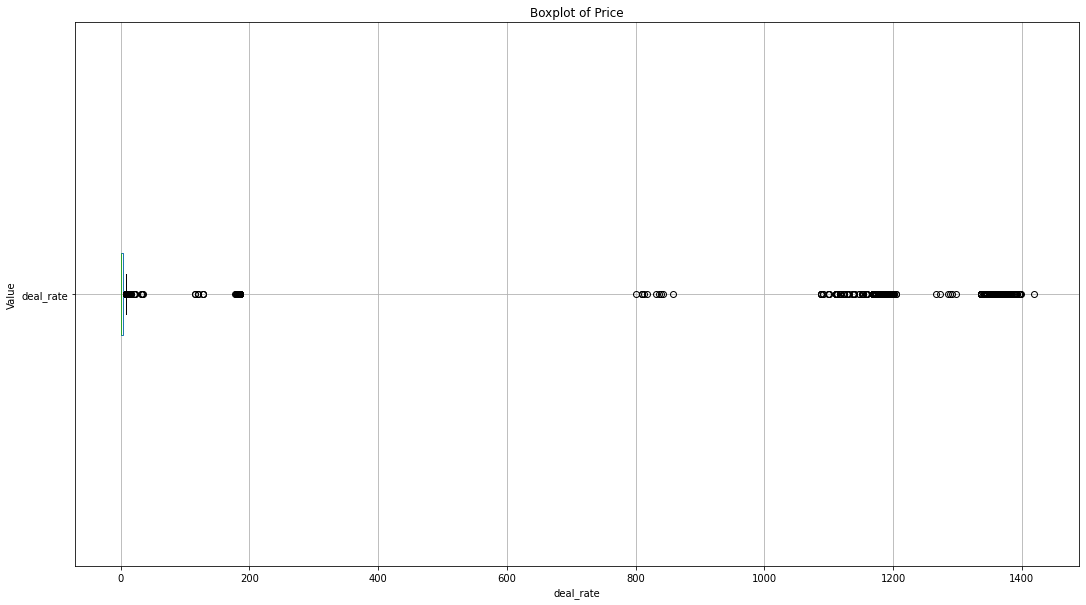

In [21]:
# Create a boxplot of the 'deal_rate' column
plt.figure(figsize=(18, 10))
df.boxplot(column='deal_rate',vert=False)

# Add titles and labels
plt.title('Boxplot of Price')
plt.xlabel('deal_rate')
plt.ylabel('Value')

# Show the plot
plt.grid(True)
plt.show()

In [22]:
mean= df['deal_rate'].mean()
df["deal_rate"].fillna(mean, inplace=True)
print(f"Filled the NaN values in 'deal_rate' column with : {mean} value")
df.head()


Filled the NaN values in 'deal_rate' column with : 60.5239600531684 value


,number,instrument_id,currency_id,currency_2_id,sign_id,deal_rate,amount,book_value,portfolio_id,state_id,cp_client_id,owner_id
0,1,USD D/L,USD,USD,1,0,262000000,262000000,ASIA-CAL-POOL,FINAL,CPTY1,CMPNY-OWNER
1,2,USD D/L,USD,USD,-1,0,-262000000,-262000000,MMPO-USD-CAL,FINAL,CPTY1,CMPNY-OWNER
2,3,USD D/L,USD,USD,-1,0.07,-641164.56,-641164.56,MMFX-CAL,FINAL,CPTY1,CMPNY-OWNER
3,4,HKD D/L,HKD,USD,1,0.06,5000000,5000000,MMFX-CAL,FINAL,CPTY1,CMPNY-OWNER
4,5,USD D/L,USD,USD,1,0.07,641164.56,641164.56,MMPO-USD-CAL,FINAL,CPTY1,CMPNY-OWNER


In [23]:
# Initialize LabelEncoder for categorical data
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in df.columns:
    df[column] = le.fit_transform(df[column])+1

# Display the DataFrame with encoded values
df.head()

,number,instrument_id,currency_id,currency_2_id,sign_id,deal_rate,amount,book_value,portfolio_id,state_id,cp_client_id,owner_id
0,1,42,32,23,3,1,10823,10822,1,1,1,1
1,2,42,32,23,1,1,180,180,17,1,1,1
2,3,42,32,23,1,1359,2291,2291,13,1,1,1
3,4,17,13,23,3,1358,9134,9133,13,1,1,1
4,5,42,32,23,3,1359,7682,7681,17,1,1,1


In [24]:
#copy the original data
data=df.copy()

In [25]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


### Model Selection and Training

#### Hierarchical Clustering

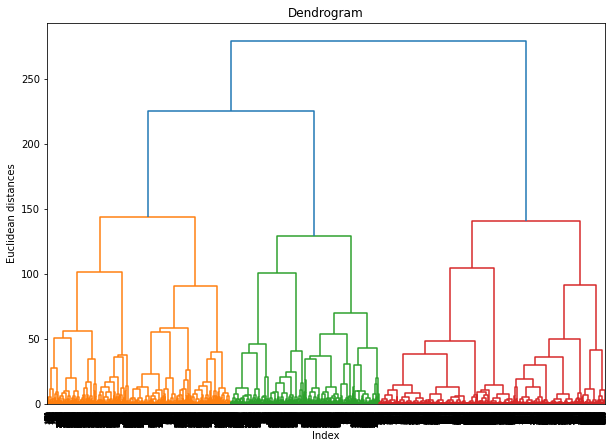

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering
linked = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean distances')
plt.show()


In [27]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
n_clusters = 5  # Define the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
#clustering.fit(data_scaled)
labels=clustering.fit_predict(data_scaled)

# Add cluster labels to the DataFrame
data['Cluster'] = clustering.labels_

In [28]:
# Count the number of points in each cluster
cluster_counts = data['Cluster'].value_counts()

# Define an anomaly threshold, e.g., clusters with a small number of points
anomaly_threshold = 10  # You can adjust this threshold based on your data
anomalous_clusters = cluster_counts[cluster_counts < anomaly_threshold].index

# Mark anomalies
data['Anomaly'] = data['Cluster'].apply(lambda x: 1 if x in anomalous_clusters else 0)

# Display anomalies
anomalies = data[data['Anomaly'] == 1]
print(anomalies)

Empty DataFrame
Columns: [number, instrument_id, currency_id, currency_2_id, sign_id, deal_rate, amount, book_value, portfolio_id, state_id, cp_client_id, owner_id, Cluster, Anomaly]
Index: []


In [29]:
anomalous_clusters

Index([], dtype='int64', name='Cluster')

In [30]:
data.head()

,number,instrument_id,currency_id,currency_2_id,sign_id,deal_rate,amount,book_value,portfolio_id,state_id,cp_client_id,owner_id,Cluster,Anomaly
0,1,42,32,23,3,1,10823,10822,1,1,1,1,1,0
1,2,42,32,23,1,1,180,180,17,1,1,1,0,0
2,3,42,32,23,1,1359,2291,2291,13,1,1,1,0,0
3,4,17,13,23,3,1358,9134,9133,13,1,1,1,3,0
4,5,42,32,23,3,1359,7682,7681,17,1,1,1,1,0


In [31]:
#Performance Evaluation using silhouette_score
print(metrics.silhouette_score(data_scaled,labels))

0.3313940037280358


In [32]:
# Assuming Data is your original dataframe
data.to_csv('hierarchical_output.csv', index=False)

In [33]:
# # Plot the clusters and anomalies
# plt.figure(figsize=(10, 7))
# plt.scatter(data['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis', marker='o', label='Data Points')
# plt.scatter(anomalies['Feature1'], anomalies['Feature2'], c='red', marker='x', label='Anomalies')
# plt.title('Hierarchical Clustering and Anomalies')
# plt.xlabel('Feature1')
# plt.ylabel('Feature2')
# plt.legend()
# plt.show()


#### DBSCAN Clustering
##### This stands for Density-Based Spatial Clustering of Applications with Noise
###### DBSCAN is a clustering algorithm that groups together closely packed data points while identifying outliers. It requires two parameters: ε (neighborhood radius) and MinPts (minimum points in ε). It forms clusters based on density, handling noise and irregularly shaped clusters effectively without needing to predefine the number of clusters.

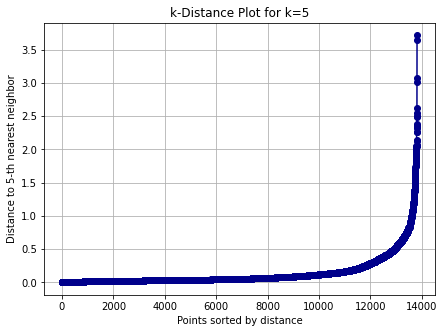

In [34]:
# Code to find the best value of Epsilon(E)
# Define the value of k (typically set to min_samples used in DBSCAN)
k = 5  # For example, if min_samples is 5 in DBSCAN

# Compute the k-nearest neighbors
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

# Extract the distances to the k-th nearest neighbor (k-1 because of zero indexing)
k_distances = np.sort(distances[:, k-1])

# Plot the k-distance graph
plt.figure(figsize=(7, 5))
plt.plot(k_distances, marker='o', linestyle='-', color='darkblue')
plt.title(f'k-Distance Plot for k={k}')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'Distance to {k}-th nearest neighbor')
plt.grid(True)
plt.show()


In [35]:
# DBSCAN Clustering Model
dbscan = DBSCAN(eps=0.9, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)

# Get the cluster labels
labels = dbscan.labels_

# the number of clusters found by DBSCAN
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")


Number of clusters found by DBSCAN: 56


In [36]:
# Identify the outliers
outliers = data_scaled[labels == -1]

# If you want to see the shape or a snippet of the outliers
print(f"Number of outliers: {outliers.shape[0]}")
print("Uniqe Clusters: ",np.unique(clusters))

Number of outliers: 183
Uniqe Clusters:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55]


In [37]:
# Get the indices of the outliers
outlier_indices = [index for index, label in enumerate(clusters) if label == -1]
# Alternatively, using numpy for the same result:
outlier_indices = np.where(labels == -1)[0]

# Print the indices of outliers
print("Indices of outliers:", outlier_indices)



Indices of outliers: [   37    84    95    96    99   100   101   104   107   108   111   236
   240   266   289   291   294   296   868   870   872   874   880   882
   884   886   899   955  1059  1060  1061  1062  1063  1064  1065  1069
  1070  1071  1072  1073  1074  1075  1079  1088  1091  1092  1097  1098
  1108  1251  1263  1304  1378  1799  3371  3372  3373  3374  3375  3376
  3377  6383  6384  6385  6386  6495  6511  7379  7556  7567  7568  7569
  7570  7571  7572  7573  7617  7618  7619  7620  7621  7622  7623  7624
  7625  7626  7627  7628  7749  7756  7805  7959  7982  7984  8196  8200
  8307  8311  8314  8381  8549  8599  8656  8663  8681  8682  8683  8684
  8685  8686  8687  8694  8695  8845  8924  8934  9394  9395  9434  9435
  9505  9635  9871  9949  9979 10327 10698 10741 10856 10868 10887 10952
 10962 10965 10969 10970 10974 10977 10978 10979 10980 10983 10984 10985
 10986 10987 10988 11047 11125 11131 11148 11575 11672 11891 11896 12089
 12186 12257 13321 13322 13377

In [38]:
# Assuming Data is your original dataframe
dbscan_outliers_df = data.iloc[outlier_indices]
dbscan_outliers_df.head()

,number,instrument_id,currency_id,currency_2_id,sign_id,deal_rate,amount,book_value,portfolio_id,state_id,cp_client_id,owner_id,Cluster,Anomaly
37,38,42,32,23,3,1359,4289,4288,17,1,1,1,1,0
84,85,7,6,23,3,1,5066,5065,9,1,1,1,3,0
95,96,1,1,23,3,1458,7343,7342,26,1,1,1,0,0
96,97,3,3,23,3,1,6867,6866,26,1,1,1,0,0
99,100,4,4,23,3,1667,4900,4899,26,1,1,1,0,0


In [39]:
## Silhouette Score/Coefficient:
# Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
# 1 : Means clusters are well apart from each other and clearly distinguished.
# 0 : Means clusters are indifferent, or we can say that the distance between clusters is not significant.
# -1: Means clusters are assigned in the wrong way.

In [40]:
#Performance Evaluation using silhouette_score
print(metrics.silhouette_score(data_scaled,labels))

0.3545794498615795


In [41]:
dbscan_outliers_df.to_csv('dbscan_outliers_output.csv', index=False)

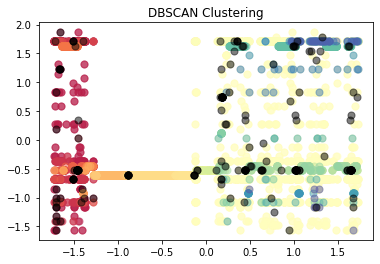

In [42]:
identified_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(identified_labels))]
for k, col in zip(identified_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for noise points (label=-1)
    class_member_mask = (labels == k)
    xy = data_scaled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', alpha=0.5,cmap='viridis')

plt.title('DBSCAN Clustering')
plt.show()

#### Finding the K Values for K-Means Clustering

In [43]:

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

  File "c:\Users\AKU493\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


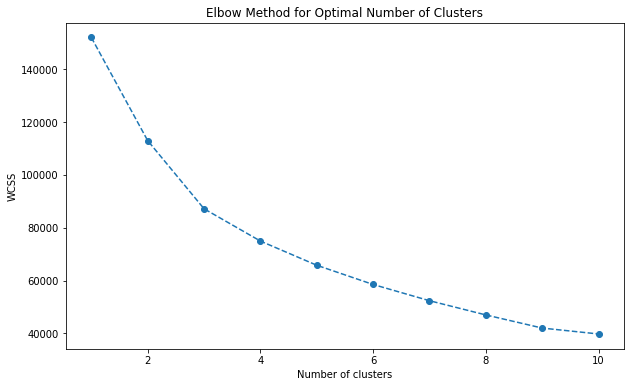

In [44]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

### K-means Clustering

In [45]:
# Train K-Means with the optimal number of clusters
optimal_clusters = 3  # Assume 3 clusters based on the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
km_clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data
data['cluster'] = km_clusters



In [46]:
data.head()

,number,instrument_id,currency_id,currency_2_id,sign_id,deal_rate,amount,book_value,portfolio_id,state_id,cp_client_id,owner_id,Cluster,Anomaly,cluster
0,1,42,32,23,3,1,10823,10822,1,1,1,1,1,0,2
1,2,42,32,23,1,1,180,180,17,1,1,1,0,0,1
2,3,42,32,23,1,1359,2291,2291,13,1,1,1,0,0,1
3,4,17,13,23,3,1358,9134,9133,13,1,1,1,3,0,2
4,5,42,32,23,3,1359,7682,7681,17,1,1,1,1,0,2


In [47]:
# # Plot the clusters (optional, requires PCA-reduced data)
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette='viridis')
# plt.title('K-Means Clusters')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.show()


In [48]:
#Performance Evaluation using silhouette_score
print(metrics.silhouette_score(data_scaled,km_clusters))

0.3213626900245193


In [49]:
# Identify outliers (transactions that are far from their cluster centroids)
distances = kmeans.transform(data_scaled)
data['distance_to_centroid'] = np.min(distances, axis=1)
threshold = data['distance_to_centroid'].quantile(0.99)  # Top 5% as potential outliers
data['outlier'] = data['distance_to_centroid'] > threshold

# Display potential outliers
outliers = data[data['outlier']]
print(outliers)

# Save the results
outliers.to_csv('k_means_anomalies_output.csv', index=False)

       number  instrument_id  currency_id  currency_2_id  sign_id  deal_rate  amount  book_value  portfolio_id  state_id  cp_client_id  owner_id  Cluster  Anomaly  cluster  distance_to_centroid  outlier
0           1             42           32             23        3          1   10823       10822             1         1             1         1        1        0        2           4.859446064     True
18         19             42           32             23        3          1    9988        9987            27         1             1         1        1        0        2           4.453601652     True
31         32             42           32             23        3          1   10809       10808             1         1             1         1        1        0        2           4.854459526     True
53         54             42           32             23        3          1    9999        9998            27         1             1         1        1        0        2           4.4503

In [50]:
#Outliers Count
data[data["outlier"] == True].count()

number                  139
instrument_id           139
currency_id             139
currency_2_id           139
sign_id                 139
deal_rate               139
amount                  139
book_value              139
portfolio_id            139
state_id                139
cp_client_id            139
owner_id                139
Cluster                 139
Anomaly                 139
cluster                 139
distance_to_centroid    139
outlier                 139
dtype: int64

### Isolation Forest Model

In [51]:
data_isofrst=df.copy()

In [52]:
#Isolation Forest

# Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_isofrst)

In [53]:
# Initialize and fit the Isolation Forest
isf = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
isf.fit(data_scaled)

# Predict anomalies
data_isofrst['anomaly'] = isf.predict(data_scaled)
data_isofrst['anomaly'] = data_isofrst['anomaly'].map({1: 0, -1: 1})

# Display the data with anomaly column
print(data_isofrst)

# Analyze anomalies
anomalies = data_isofrst[data_isofrst['anomaly'] == 1]
print("\nTotal Anomalies count is {}".format(anomalies.shape[0]))



       number  instrument_id  currency_id  currency_2_id  sign_id  deal_rate  amount  book_value  portfolio_id  state_id  cp_client_id  owner_id  anomaly
0           1             42           32             23        3          1   10823       10822             1         1             1         1        1
1           2             42           32             23        1          1     180         180            17         1             1         1        0
2           3             42           32             23        1       1359    2291        2291            13         1             1         1        0
3           4             17           13             23        3       1358    9134        9133            13         1             1         1        0
4           5             42           32             23        3       1359    7682        7681            17         1             1         1        0
5           6             17           13             23        1       1358

In [54]:
print(anomalies.head())
# Save the results
anomalies.to_csv('Isolation_Forest_anomalies_output.csv', index=False)

    number  instrument_id  currency_id  currency_2_id  sign_id  deal_rate  amount  book_value  portfolio_id  state_id  cp_client_id  owner_id  anomaly
0        1             42           32             23        3          1   10823       10822             1         1             1         1        1
31      32             42           32             23        3          1   10809       10808             1         1             1         1        1
67      68             42           32             23        3          1   10800       10799             1         1             1         1        1
70      71              3            3             23        3          1    9335        9334             9         1             1         1        1
95      96              1            1             23        3       1458    7343        7342            26         1             1         1        1


In [55]:
#Performance Evaluation using silhouette_score
print(metrics.silhouette_score(data_scaled,data_isofrst['anomaly'] ))

0.1895249086516224
